In [144]:
import pandas as pd

In [145]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import  accuracy_score


In [146]:

data=pd.read_csv('/content/train_data.txt',sep=":::",names=["Movie_name","Gener","Description"],engine="python")
data.head(10)

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [147]:
tdata=pd.read_csv('/content/test_data_solution.txt',sep=":::",names=["Movie_name","Gener","Description"],engine="python")
tdata.head(10)

,Movie_name,Gener,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
6,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...
7,L'amica (1969),drama,The beautiful but neglected wife of a brillia...
8,Ina Mina Dika (1989),comedy,Vasu Inamdar (Ina) suffers from a disorder wh...
9,Equinox Special: Britain's Tornados (2005),documentary,An insight into the tornados that hit Kensal ...
10,Press (2011),drama,Press is a story of young people overwhelmed ...


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   54214 non-null  object
 1   Gener        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [149]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   54200 non-null  object
 1   Gener        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [150]:
tdata.describe()

,Movie_name,Gener,Description
count,54200,54200,54200
unique,54200,27,54072
top,Edgar's Lunch (1998),drama,Grammy - music award of the American academy ...
freq,1,13612,10


In [151]:
data.describe()

,Movie_name,Gener,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [152]:
data.isnull().sum()

,0
Movie_name,0
Gener,0
Description,0


In [153]:
tdata.isnull().sum()

,0
Movie_name,0
Gener,0
Description,0


In [154]:
data.count()

,0
Movie_name,54214
Gener,54214
Description,54214


In [155]:
tdata.count()

,0
Movie_name,54200
Gener,54200
Description,54200


In [156]:
data.iloc[0:5]

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [157]:
data.loc[5]

,5
Movie_name,The Unrecovered (2007)
Gener,drama
Description,The film's title refers not only to the un-re...


In [158]:
tdata.shape

(54200, 3)

In [159]:
data.shape

(54214, 3)

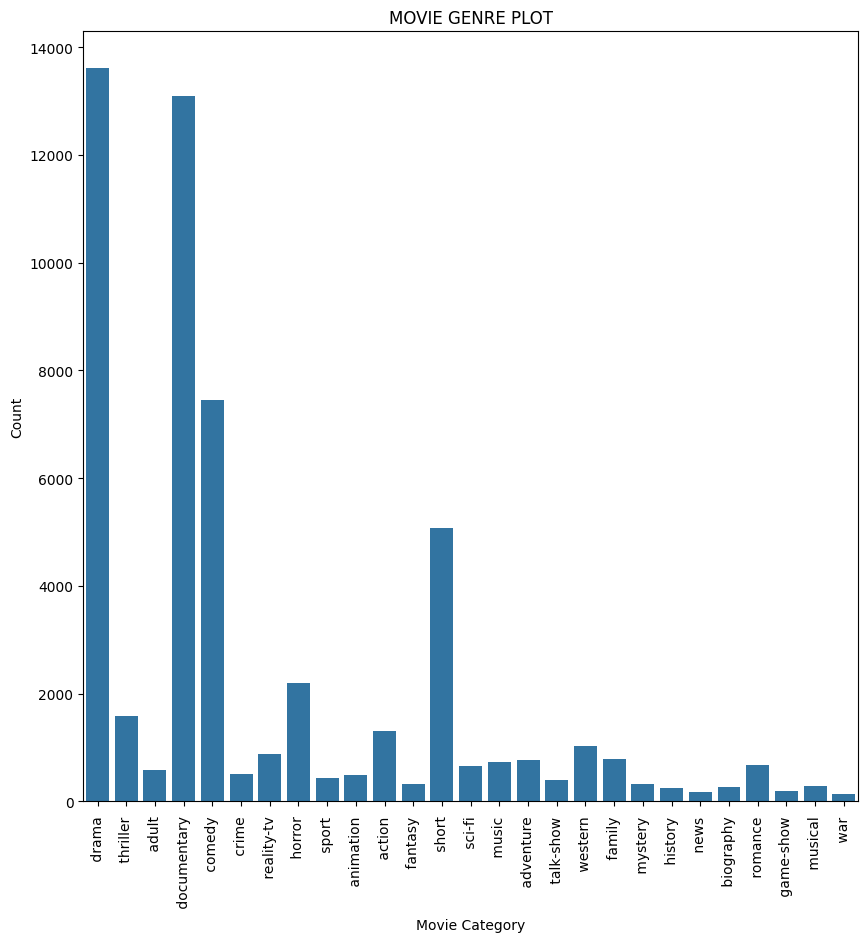

In [160]:
plt.figure(figsize=(10,10))
sns.countplot(x='Gener', data=data)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('MOVIE GENRE PLOT')
plt.xticks(rotation=90)
plt.show()


# New Section

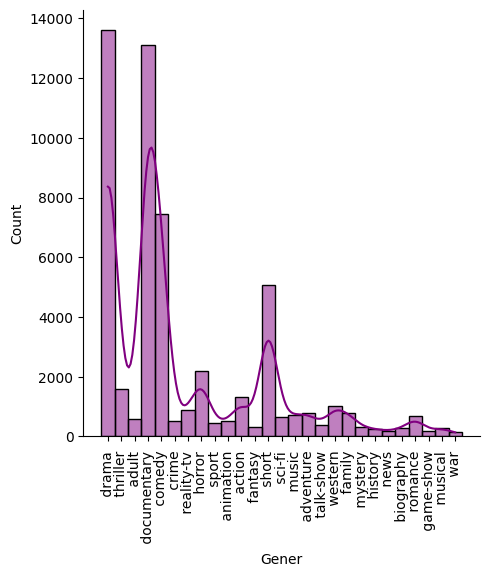

In [161]:
sns.displot(data.Gener,kde =True,color='purple')
plt.xticks(rotation=90);

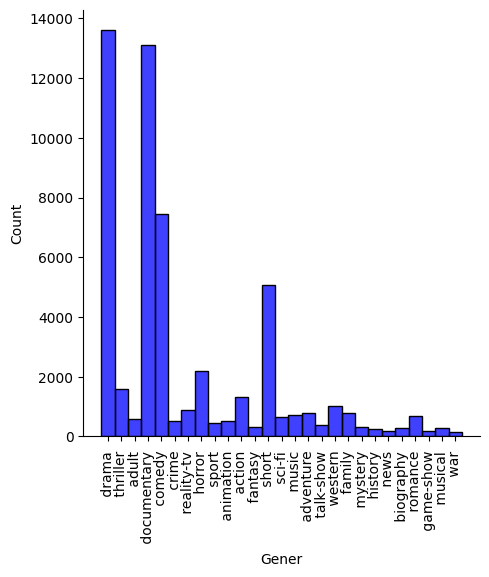

In [162]:
sns.displot(data.Gener, kde=False,color="blue")
plt.xticks(rotation=90);


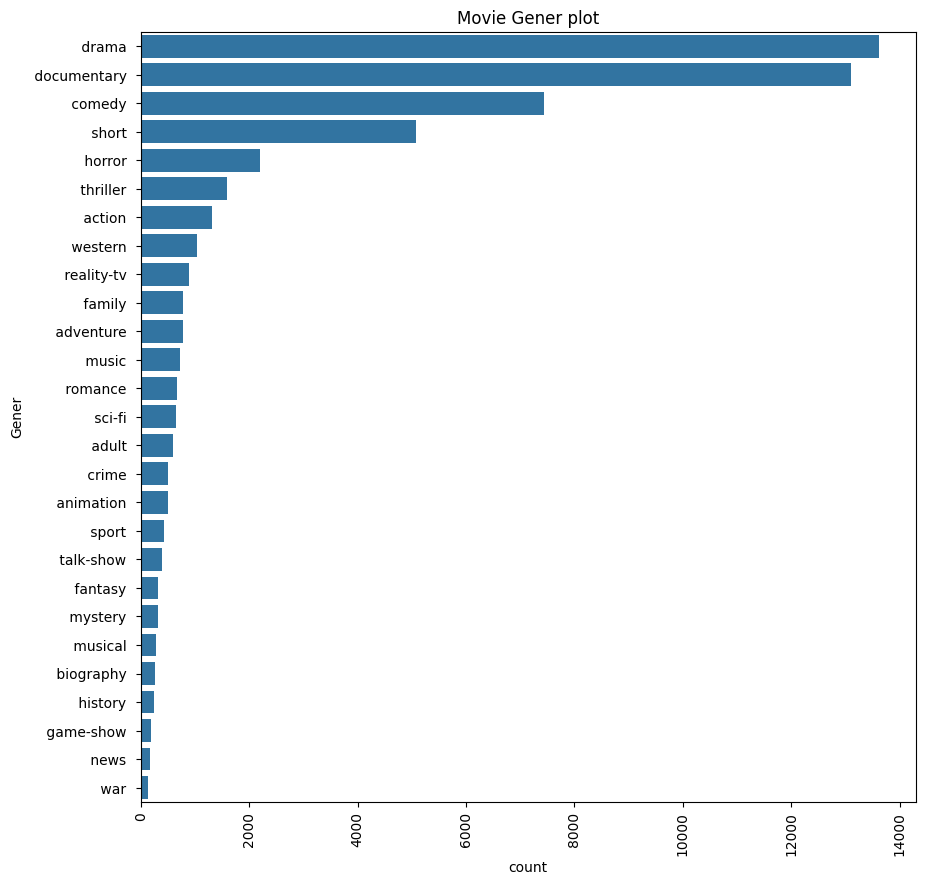

In [163]:
plt.figure(figsize=(10,10))
count1=data.Gener.value_counts()
sns.barplot(x=count1,y=count1.index,orient='h')
plt.xlabel('count')
plt.ylabel('Gener')
plt.title('Movie Gener plot')
plt.xticks(rotation=90)
plt.show()

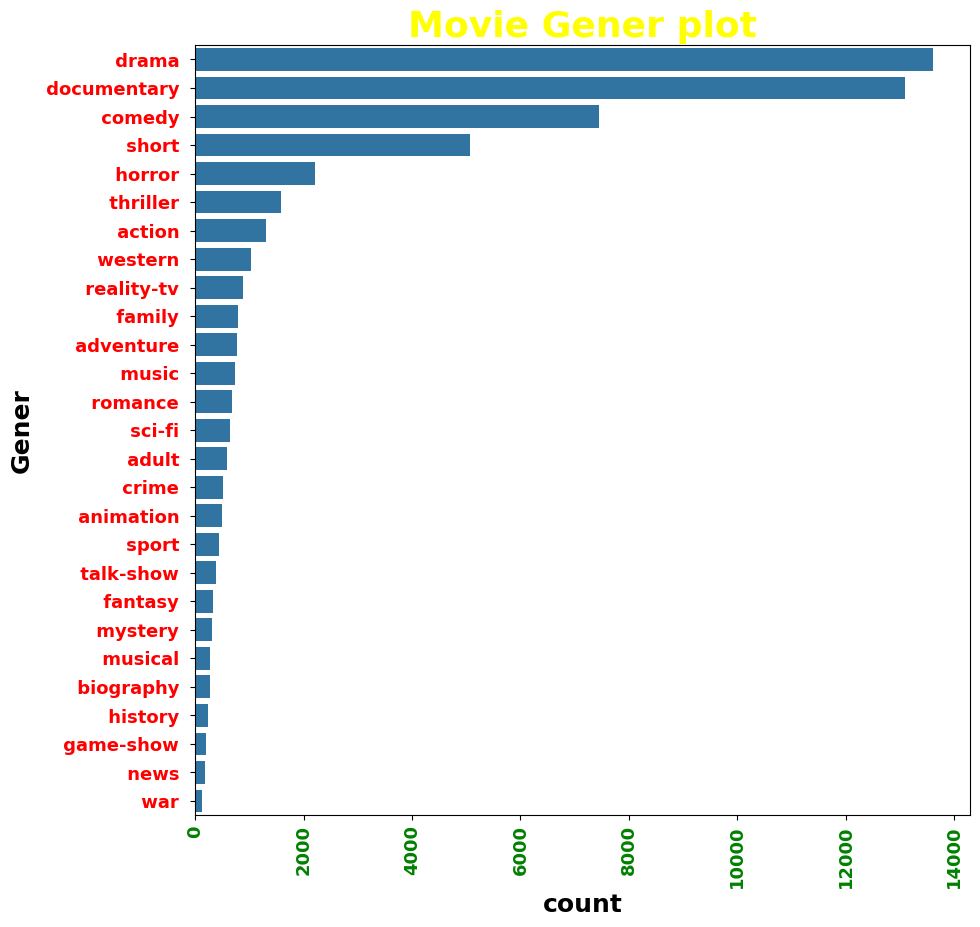

In [164]:
plt.figure(figsize=(10,10))
count1=data.Gener.value_counts()
sns.barplot(x=count1,y=count1.index,orient='h')
plt.xlabel('count',fontsize=18,fontweight='bold')
plt.ylabel('Gener',fontsize=18,fontweight='bold')
plt.title('Movie Gener plot',fontsize=26,fontweight='bold',color='yellow')
plt.xticks(rotation=90,fontsize=13,fontweight='bold',color='green')
plt.yticks(fontsize=13,fontweight='bold',color='red')
plt.show()

In [165]:
combined=pd.concat([data,tdata],axis=0)

In [166]:
combined.head()

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [167]:
combined.shape

(108414, 3)

In [168]:
combined.size

325242

In [169]:
combined.isnull().any()

,0
Movie_name,False
Gener,False
Description,False


In [170]:
combined.count()

,0
Movie_name,108414
Gener,108414
Description,108414


In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
le = LabelEncoder()
combined['Gener'] = le.fit_transform(combined["Gener"].values)


In [173]:

combined['Movie_name'] = le.fit_transform(combined["Movie_name"].values)


In [174]:
combined.head()

,Movie_name,Gener,Description
1,70147,8,Listening in to a conversation between his do...
2,31219,24,A brother and sister with a past incestuous r...
3,107508,1,As the bus empties the students for their fie...
4,96121,8,To help their unemployed father make ends mee...
5,97559,8,The film's title refers not only to the un-re...


In [175]:
combined.Gener=combined.Gener.fillna(combined.Gener.mean())

In [176]:
combined.count()

,0
Movie_name,108414
Gener,108414
Description,108414


In [177]:
combined.duplicated().values.any()

False

In [143]:
vec=TfidfVectorizer()

In [178]:
x=vec.fit_transform(combined['Description'])

In [179]:
combined.head()

,Movie_name,Gener,Description
1,70147,8,Listening in to a conversation between his do...
2,31219,24,A brother and sister with a past incestuous r...
3,107508,1,As the bus empties the students for their fie...
4,96121,8,To help their unemployed father make ends mee...
5,97559,8,The film's title refers not only to the un-re...


In [180]:
y=combined['Gener']

In [181]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=40)

In [182]:
from sklearn.naive_bayes import MultinomialNB


In [183]:
nbm=MultinomialNB()
nbm.fit(xtrain,ytrain)

MultinomialNB()

In [184]:
nb_predict=nbm.predict(xtest)

In [185]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix



In [186]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, r2_score


In [187]:
print("Naive Bayes Model:")
print(confusion_matrix(ytest,nb_predict))
print(classification_report(ytest,nb_predict))
print("Accuracy:",accuracy_score(ytest,nb_predict))
print("r2_Score:",r2_score(ytest,nb_predict))

Naive Bayes Model:
[[   0    0    0    0    0    0    0  168  518    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    5    0   37  267    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    6    0  109  255    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   82  139    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   91   35    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0  138    0  648 2934    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    2    0   31  234    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
from sklearn.linear_model import LogisticRegression



In [189]:
lr=LogisticRegression()

In [ ]:
lr.fit(xtrain,ytrain)

In [ ]:
lr_predict=lr.predict(xtest)


In [ ]:
print("Logistic Regression Model:")
print(confusion_matrix(ytest,lr_predict))
print(classification_report(ytest,lr_predict))
print("Accuracy:",accuracy_score(ytest,lr_predict))
print("r2_score:",r2_score(ytest,lr_predict))